In [1]:
import cupy as np
import cudf as pd
import matplotlib.pyplot as plt
import pickle 
from library import utils, config, cascades

In [2]:
with open('./results/nopricechange/7-9/traderIDs_200_7200_100_5_10.pkl', 'rb') as f:
    traderIDsNPC = pickle.load(f)

Importing MATLAB


In [3]:
stockPoolNPC = np.load("./results/nopricechange/7-9/stockPool_200_7200_100_5_10.npy")
hurstPoolNPC = np.load("./results/nopricechange/7-9/hurstPool_200_7200_100_5_10.npy")
# TtransactionsNPC = pd.read_csv("./results/nopricechange/7-9/transactions_200_7200_100_2_5.csv")
TtotalOrdersNPC = pd.read_csv("./results/nopricechange/7-9/totalOrders_200_7200_100_5_10.csv")

In [4]:
(TtotalOrdersNPC)

Unnamed: 0  time portfolio  stock  order
0                 1   993     yshfc      1   -1.0
1                 2   993     yshfc      2   -2.0
2                10   993     yshfc     10    1.0
3                11   993     yshfc     11    1.0
4                13   993     yshfc     13   -1.0
...             ...   ...       ...    ...    ...
3836251           7  8192     xbcot     35    1.0
3836252           9  8192     xbcot     42    1.0
3836253           2  8192     jmeyl     76    1.0
3836254           3  8192     jmeyl     43   -1.0
3836255          16  8192     jmeyl     66   -1.0

[3836256 rows x 5 columns]

In [ ]:
# def findStockOrderCascades(stockOrders, cascades, minSep = 2):
#     """
#     inpurt filtered stockOrders table
#     works on stockOrder tables from TtotalOrders, returns panda tables of each cascade
#     returns all cascades
#     FOR LOOKING AT INDIVIDUAL STOCK CASCADES NOV14
#     """
#     if len(stockOrders) > 0 :
#         #Find seperations in trading times
#         ToS = stockOrders['time'].unique()
#         sep = np.diff(ToS)
#         keySep = np.where(sep>minSep)[0]
#         i0 = 0

#         if len(cascades) > 0:
#             n = max(cascades.keys())
#         else:
#             # first cascade
#             n = 0

#         if len(keySep)>0:
#             for key in keySep:
#                 key += 1
#                 stockCascade = stockOrders[stockOrders['time']<=ToS[key]]
#                 stockCascade = stockCascade[stockCascade['time']>=ToS[i0]]
#                 cascades[n] = stockCascade
#                 i0 = key
#                 n += 1
                
#     #cascades is a dictionary
#     return cascades

# def stockOrderCascadeAnalyzer(Ttotalorders, stockPool, t0, tf, minSep ):    
#     """
#     analysis for stock order cascades seen in draft 8.#
#     ALL IN ONE
#     """
#     cascades = {}
#     for stock in range(len(stockPool)):
#         cascades = findStockOrderCascades(Ttotalorders[Ttotalorders['stock']==stock], cascades = cascades, minSep = minSep)

#     sizes, nrows, duration = cascadeAnalyzer(cascades, stockPool, t0=t0, tf=tf)

#     return sizes, nrows, duration 

# minSep = 1

In [6]:
sizes1, nrows1, duration1 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992,1)

TypeError: where() missing 1 required positional argument: 'cond'

In [ ]:
hist, bins = np.histogram(nrows1, bins=np.logspace(np.log10(min(nrows1)),np.log10(max(nrows1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2), '-.', label= "$x^{-1..2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes1, bins=np.logspace(np.log10(min(sizes1)),np.log10(max(sizes1)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*8, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration1, bins=np.logspace(np.log10(min(duration1)),np.log10(max(duration1)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration1),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.4)*5, '-.', label= "$x^{-1.4}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep1_.png", dpi=250)
plt.show()
plt.close()

# minSep = 2

In [ ]:
sizes2, nrows2, duration2 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 2)

In [ ]:
hist, bins = np.histogram(nrows2, bins=np.logspace(np.log10(min(nrows2)),np.log10(max(nrows2)),18))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.15), '-.', label= "$x^{-1.15}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes2, bins=np.logspace(np.log10(min(sizes2)),np.log10(max(sizes2)),17))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration2, bins=np.logspace(np.log10(min(duration2)),np.log10(max(duration2)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration2),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*8, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep2_.png", dpi=250)
plt.show()
plt.close()

# minSep = 5

In [ ]:
sizes5, nrows5, duration5 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 5)

In [ ]:
hist, bins = np.histogram(nrows5, bins=np.logspace(np.log10(min(nrows5)),np.log10(max(nrows5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.0)*5, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes5, bins=np.logspace(np.log10(min(sizes5)),np.log10(max(sizes5)),14))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.2)*4, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 5")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_vol_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration5, bins=np.logspace(np.log10(min(duration5)),np.log10(max(duration5)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration5),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.55)*6, '-.', label= "$x^{-1.55}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 5")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep5_.png", dpi=250)
plt.show()
plt.close()

# minSep = 10

In [ ]:
sizes10, nrows10, duration10 = cascades.stockOrderCascadeAnalyzer(TtotalOrdersNPC, stockPoolNPC, 993, 5992, 10)

In [ ]:
hist, bins = np.histogram(nrows10, bins=np.logspace(np.log10(min(nrows10)),np.log10(max(nrows10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(nrows10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (ntrans) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_ntrans_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(sizes10, bins=np.logspace(np.log10(min(sizes10)),np.log10(max(sizes10)),20))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(sizes10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1), '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (volume) | Min Down Time: 10")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_volume_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

In [ ]:
hist, bins = np.histogram(duration10, bins=np.logspace(np.log10(min(duration10)),np.log10(max(duration10)),15))
binsize = np.diff(bins)

mid = np.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = np.append(mid,avg)

plt.plot(mid,np.divide(hist,binsize)/len(duration10),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,np.power(mid,-1.3)*7, '-.', label= "$x^{-1.3}$")
plt.loglog()
plt.legend()
plt.title("NPC Individual Stock Cascade (duration) | Min Down Time: 10")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
# plt.savefig("./results/nopricechange/7-9/npcplots/stockcascadesize_duration_npc100_7200_100_new2threshold_fixedhurst_minSep10_.png", dpi=250)
plt.show()
plt.close()

# Causal Cascades

In [4]:
def findCascadesGPU(TtotalOrders, traderIDs, maxtimeeff, maxSep):
    """
    find causal cascades USING GPU
    conda activate rapids-0.16
    """

    cascades = {}
    numCascade = 0
    while len(TtotalOrders) > 0:
        print("OG Orders left: ", len(TtotalOrders))
        
        # Seed portfolio to begin the cascade
        seed = TtotalOrders['portfolio'].loc[0]
        t0 = TtotalOrders['time'].loc[0]
        seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
        cascades[numCascade] = seedCascade

        # Dictionary keeping track of how long a stock is still "affected" from previous trade
        stockTimes = {}

        for row in np.asarray(seedCascade.index):
            row = row.item()
            stock = seedCascade['stock'].loc[row]
            time = seedCascade['time'].loc[row]
            order = seedCascade['order'].loc[row]
            if stock in stockTimes:
                stockTimes[stock] += abs(order)*maxtimeeff
            else:
                stockTimes[stock] = time + abs(order)*maxtimeeff

        # check first cascade is greater than 0
        assert len(seedCascade) > 0

        # remove rows included in first cascade from the order list
        TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)

        #PT2 Portfolio perspective
        for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
            match = False
             # see if the current portfolio has overlapping stocks with the ongoing cascade 
            if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
                 # check if overlapping portfolio is already included in the ongoing cascade
                if childPortf not in cascades[numCascade]['portfolio']:
                     # include new portfolio into the cascade along with all of its cascading trading activity
                    childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
                     # check if trading activity falls into the time affect window of ongoing cascade
                    for row in np.asarray(childPortfCascade.index):
                        row = row.item()
                        stock = childPortfCascade['stock'].loc[row]
                        time = childPortfCascade['time'].loc[row]
                        order = childPortfCascade['order'].loc[row]
                        if stock in stockTimes:
                            if time <= stockTimes[stock]:
                                match = True
                                break 
                                
                    if match == True:        
                         # add new cascade to the ongoing cascade and remove rows from the orderList
                        cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
                        TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
                        
                         # add new stocks and their time affects, or extend time affects of previous stocks
                        for row in np.asarray(childPortfCascade.index):
                            row = row.item()
                            stock = childPortfCascade['stock'].loc[row]
                            time = childPortfCascade['time'].loc[row]
                            order = childPortfCascade['order'].loc[row]
                            if stock in stockTimes:
                                stockTimes[stock] += abs(order)*maxtimeeff
                            else:
                                stockTimes[stock] = time + abs(order)*maxtimeeff

        print("Cascade length: ",len(cascades[numCascade]))
        print("New Orders left: ", len(TtotalOrders))
        print("making new cascade")
        print("\n")
        numCascade += 1
        TtotalOrders.reset_index(drop = True, inplace=True)
        
    return cascades

def cascadeAnalyzerGPU(cascades, stockPool, t0 , tf):
    """
    returns arrays of general cascade sizes (value), nrows, and duration for histogramming
    CALL FINDCASCADES FIRST FOR CAUSAL CASCADES
    """
    sizes = np.array([])
    nrows = np.array([])
    duration = np.array([])
    numCascade = len(cascades)
    for i in range(numCascade):
        casc = cascades[i]
        if casc['time'].min() > t0 and casc['time'].max() < tf:
            size = 0
            for row in range(len(casc)):
                time = (casc['time'].iloc[row])
                stock = (casc['stock'].iloc[row])
                volume = (casc['order'].iloc[row])
                size += stockPool[stock][time]*abs(volume)
            dur = casc['time'].max()-casc['time'].min()
            if dur == 0:
                dur = 1
            duration = np.concatenate((duration, np.array([int(dur)])))
            sizes = np.concatenate((sizes, np.array([int(size)])))
            nrows = np.concatenate((nrows, np.array([int(len(casc))])))
        # else:
            # print('passed cascade '+ str(i) + ' of size ' + str(len(cascades[i])))
            
    return sizes, nrows, duration

def findPortfOrderCascadeGPU(TtotalOrders, portf, t0, maxSep = 1):
    """
    finds all subsequent activity traded by a portfolio (time threshold) (1 cascade only)
    input TtotalOrders, the portfolio, and minimum time
    Using Portf cascade is more logical than stock cascade
    FOR REAL CASCADES Aug18
    """

    portfOrders = TtotalOrders[TtotalOrders['portfolio']==portf]
    portfOrders = portfOrders[portfOrders['time']>=t0]

    if len(portfOrders)>0:
        ToS = portfOrders['time'].unique()
        sep = np.diff(ToS)
        keySep = np.where(sep>maxSep)[0]
        if len(keySep)>0:
            endtime = int(ToS.take(int(keySep[0]))) #end of this cascade

        else:
            endtime = int(ToS.take(-1))

        portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]
        return portfCascade
    
    else:
        return pd.DataFrame()

#Potential faster code?
# stockTimes = Dict.empty(key_type=types.uint64, value_type=types.uint64)
# # global stockTimes
# def stockTimer(stock,time, order, out1, maxtimeeff):
#     for i, (s,t,o) in enumerate(zip(stock,time,order)):
#         out1[i] = t + abs(o*maxtimeeff)
#         if s not in stockTimes:
#             stockTimes[int(s)] = int(t + abs(o)*maxtimeeff)
#         else:
#             stockTimes[int(s)] += int(abs(o)*maxtimeeff)
# seedCascade = seedCascade.apply_rows(stockTimer, 
#                        incols=['stock', 'time', 'order'],
#                        outcols=dict(out1=np.int64),
#                        kwargs=dict(maxtimeeff=2))


In [5]:
causalCascades22 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 2)
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades22_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades22, handle, protocol=pickle.HIGHEST_PROTOCOL)

OG Orders left:  1322106
Cascade length:  6521
New Orders left:  1315585
making new cascade


OG Orders left:  1315585
Cascade length:  4574
New Orders left:  1311011
making new cascade


OG Orders left:  1311011
Cascade length:  4773
New Orders left:  1306238
making new cascade


OG Orders left:  1306238
Cascade length:  513
New Orders left:  1305725
making new cascade


OG Orders left:  1305725
Cascade length:  3713
New Orders left:  1302012
making new cascade


OG Orders left:  1302012
Cascade length:  3664
New Orders left:  1298348
making new cascade


OG Orders left:  1298348
Cascade length:  2887
New Orders left:  1295461
making new cascade


OG Orders left:  1295461
Cascade length:  4114
New Orders left:  1291347
making new cascade


OG Orders left:  1291347
Cascade length:  4239
New Orders left:  1287108
making new cascade


OG Orders left:  1287108
Cascade length:  2192
New Orders left:  1284916
making new cascade


OG Orders left:  1284916
Cascade length:  1447
New Orders lef

Cascade length:  1160
New Orders left:  1191467
making new cascade


OG Orders left:  1191467
Cascade length:  1116
New Orders left:  1190351
making new cascade


OG Orders left:  1190351
Cascade length:  13
New Orders left:  1190338
making new cascade


OG Orders left:  1190338
Cascade length:  12
New Orders left:  1190326
making new cascade


OG Orders left:  1190326
Cascade length:  1246
New Orders left:  1189080
making new cascade


OG Orders left:  1189080
Cascade length:  11
New Orders left:  1189069
making new cascade


OG Orders left:  1189069
Cascade length:  1275
New Orders left:  1187794
making new cascade


OG Orders left:  1187794
Cascade length:  1
New Orders left:  1187793
making new cascade


OG Orders left:  1187793
Cascade length:  6
New Orders left:  1187787
making new cascade


OG Orders left:  1187787
Cascade length:  7
New Orders left:  1187780
making new cascade


OG Orders left:  1187780
Cascade length:  277
New Orders left:  1187503
making new cascade


OG Orde

Cascade length:  888
New Orders left:  1138096
making new cascade


OG Orders left:  1138096
Cascade length:  983
New Orders left:  1137113
making new cascade


OG Orders left:  1137113
Cascade length:  486
New Orders left:  1136627
making new cascade


OG Orders left:  1136627
Cascade length:  716
New Orders left:  1135911
making new cascade


OG Orders left:  1135911
Cascade length:  1037
New Orders left:  1134874
making new cascade


OG Orders left:  1134874
Cascade length:  3
New Orders left:  1134871
making new cascade


OG Orders left:  1134871
Cascade length:  9
New Orders left:  1134862
making new cascade


OG Orders left:  1134862
Cascade length:  627
New Orders left:  1134235
making new cascade


OG Orders left:  1134235
Cascade length:  1178
New Orders left:  1133057
making new cascade


OG Orders left:  1133057
Cascade length:  473
New Orders left:  1132584
making new cascade


OG Orders left:  1132584
Cascade length:  1046
New Orders left:  1131538
making new cascade


OG 

Cascade length:  28
New Orders left:  1091802
making new cascade


OG Orders left:  1091802
Cascade length:  2
New Orders left:  1091800
making new cascade


OG Orders left:  1091800
Cascade length:  983
New Orders left:  1090817
making new cascade


OG Orders left:  1090817
Cascade length:  239
New Orders left:  1090578
making new cascade


OG Orders left:  1090578
Cascade length:  105
New Orders left:  1090473
making new cascade


OG Orders left:  1090473
Cascade length:  414
New Orders left:  1090059
making new cascade


OG Orders left:  1090059
Cascade length:  1627
New Orders left:  1088432
making new cascade


OG Orders left:  1088432
Cascade length:  158
New Orders left:  1088274
making new cascade


OG Orders left:  1088274
Cascade length:  14
New Orders left:  1088260
making new cascade


OG Orders left:  1088260
Cascade length:  102
New Orders left:  1088158
making new cascade


OG Orders left:  1088158
Cascade length:  443
New Orders left:  1087715
making new cascade


OG Or

Cascade length:  18
New Orders left:  1050809
making new cascade


OG Orders left:  1050809
Cascade length:  3
New Orders left:  1050806
making new cascade


OG Orders left:  1050806
Cascade length:  793
New Orders left:  1050013
making new cascade


OG Orders left:  1050013
Cascade length:  14
New Orders left:  1049999
making new cascade


OG Orders left:  1049999
Cascade length:  78
New Orders left:  1049921
making new cascade


OG Orders left:  1049921
Cascade length:  201
New Orders left:  1049720
making new cascade


OG Orders left:  1049720
Cascade length:  5
New Orders left:  1049715
making new cascade


OG Orders left:  1049715
Cascade length:  355
New Orders left:  1049360
making new cascade


OG Orders left:  1049360
Cascade length:  520
New Orders left:  1048840
making new cascade


OG Orders left:  1048840
Cascade length:  91
New Orders left:  1048749
making new cascade


OG Orders left:  1048749
Cascade length:  17
New Orders left:  1048732
making new cascade


OG Orders l

Cascade length:  26
New Orders left:  1023703
making new cascade


OG Orders left:  1023703
Cascade length:  1312
New Orders left:  1022391
making new cascade


OG Orders left:  1022391
Cascade length:  25
New Orders left:  1022366
making new cascade


OG Orders left:  1022366
Cascade length:  16
New Orders left:  1022350
making new cascade


OG Orders left:  1022350
Cascade length:  1393
New Orders left:  1020957
making new cascade


OG Orders left:  1020957
Cascade length:  1502
New Orders left:  1019455
making new cascade


OG Orders left:  1019455
Cascade length:  6
New Orders left:  1019449
making new cascade


OG Orders left:  1019449
Cascade length:  26
New Orders left:  1019423
making new cascade


OG Orders left:  1019423
Cascade length:  264
New Orders left:  1019159
making new cascade


OG Orders left:  1019159
Cascade length:  49
New Orders left:  1019110
making new cascade


OG Orders left:  1019110
Cascade length:  62
New Orders left:  1019048
making new cascade


OG Orde

Cascade length:  199
New Orders left:  983938
making new cascade


OG Orders left:  983938
Cascade length:  786
New Orders left:  983152
making new cascade


OG Orders left:  983152
Cascade length:  27
New Orders left:  983125
making new cascade


OG Orders left:  983125
Cascade length:  1232
New Orders left:  981893
making new cascade


OG Orders left:  981893
Cascade length:  1008
New Orders left:  980885
making new cascade


OG Orders left:  980885
Cascade length:  347
New Orders left:  980538
making new cascade


OG Orders left:  980538
Cascade length:  69
New Orders left:  980469
making new cascade


OG Orders left:  980469
Cascade length:  87
New Orders left:  980382
making new cascade


OG Orders left:  980382
Cascade length:  1112
New Orders left:  979270
making new cascade


OG Orders left:  979270
Cascade length:  959
New Orders left:  978311
making new cascade


OG Orders left:  978311
Cascade length:  86
New Orders left:  978225
making new cascade


OG Orders left:  978225


Cascade length:  56
New Orders left:  943149
making new cascade


OG Orders left:  943149
Cascade length:  6
New Orders left:  943143
making new cascade


OG Orders left:  943143
Cascade length:  1348
New Orders left:  941795
making new cascade


OG Orders left:  941795
Cascade length:  75
New Orders left:  941720
making new cascade


OG Orders left:  941720
Cascade length:  630
New Orders left:  941090
making new cascade


OG Orders left:  941090
Cascade length:  22
New Orders left:  941068
making new cascade


OG Orders left:  941068
Cascade length:  1550
New Orders left:  939518
making new cascade


OG Orders left:  939518
Cascade length:  1031
New Orders left:  938487
making new cascade


OG Orders left:  938487
Cascade length:  137
New Orders left:  938350
making new cascade


OG Orders left:  938350
Cascade length:  367
New Orders left:  937983
making new cascade


OG Orders left:  937983
Cascade length:  63
New Orders left:  937920
making new cascade


OG Orders left:  937920
Ca

Cascade length:  26
New Orders left:  879263
making new cascade


OG Orders left:  879263
Cascade length:  449
New Orders left:  878814
making new cascade


OG Orders left:  878814
Cascade length:  971
New Orders left:  877843
making new cascade


OG Orders left:  877843
Cascade length:  15
New Orders left:  877828
making new cascade


OG Orders left:  877828
Cascade length:  450
New Orders left:  877378
making new cascade


OG Orders left:  877378
Cascade length:  1186
New Orders left:  876192
making new cascade


OG Orders left:  876192
Cascade length:  1
New Orders left:  876191
making new cascade


OG Orders left:  876191
Cascade length:  20
New Orders left:  876171
making new cascade


OG Orders left:  876171
Cascade length:  1241
New Orders left:  874930
making new cascade


OG Orders left:  874930
Cascade length:  53
New Orders left:  874877
making new cascade


OG Orders left:  874877
Cascade length:  812
New Orders left:  874065
making new cascade


OG Orders left:  874065
Cas

Cascade length:  22
New Orders left:  839983
making new cascade


OG Orders left:  839983
Cascade length:  669
New Orders left:  839314
making new cascade


OG Orders left:  839314
Cascade length:  20
New Orders left:  839294
making new cascade


OG Orders left:  839294
Cascade length:  1286
New Orders left:  838008
making new cascade


OG Orders left:  838008
Cascade length:  72
New Orders left:  837936
making new cascade


OG Orders left:  837936
Cascade length:  9
New Orders left:  837927
making new cascade


OG Orders left:  837927
Cascade length:  1
New Orders left:  837926
making new cascade


OG Orders left:  837926
Cascade length:  999
New Orders left:  836927
making new cascade


OG Orders left:  836927
Cascade length:  196
New Orders left:  836731
making new cascade


OG Orders left:  836731
Cascade length:  34
New Orders left:  836697
making new cascade


OG Orders left:  836697
Cascade length:  31
New Orders left:  836666
making new cascade


OG Orders left:  836666
Cascade

Cascade length:  2216
New Orders left:  807524
making new cascade


OG Orders left:  807524
Cascade length:  258
New Orders left:  807266
making new cascade


OG Orders left:  807266
Cascade length:  2
New Orders left:  807264
making new cascade


OG Orders left:  807264
Cascade length:  626
New Orders left:  806638
making new cascade


OG Orders left:  806638
Cascade length:  21
New Orders left:  806617
making new cascade


OG Orders left:  806617
Cascade length:  11
New Orders left:  806606
making new cascade


OG Orders left:  806606
Cascade length:  379
New Orders left:  806227
making new cascade


OG Orders left:  806227
Cascade length:  615
New Orders left:  805612
making new cascade


OG Orders left:  805612
Cascade length:  1023
New Orders left:  804589
making new cascade


OG Orders left:  804589
Cascade length:  12
New Orders left:  804577
making new cascade


OG Orders left:  804577
Cascade length:  59
New Orders left:  804518
making new cascade


OG Orders left:  804518
Cas

Cascade length:  100
New Orders left:  761166
making new cascade


OG Orders left:  761166
Cascade length:  1063
New Orders left:  760103
making new cascade


OG Orders left:  760103
Cascade length:  792
New Orders left:  759311
making new cascade


OG Orders left:  759311
Cascade length:  11
New Orders left:  759300
making new cascade


OG Orders left:  759300
Cascade length:  747
New Orders left:  758553
making new cascade


OG Orders left:  758553
Cascade length:  96
New Orders left:  758457
making new cascade


OG Orders left:  758457
Cascade length:  1
New Orders left:  758456
making new cascade


OG Orders left:  758456
Cascade length:  28
New Orders left:  758428
making new cascade


OG Orders left:  758428
Cascade length:  10
New Orders left:  758418
making new cascade


OG Orders left:  758418
Cascade length:  981
New Orders left:  757437
making new cascade


OG Orders left:  757437
Cascade length:  37
New Orders left:  757400
making new cascade


OG Orders left:  757400
Casca

Cascade length:  17
New Orders left:  731586
making new cascade


OG Orders left:  731586
Cascade length:  116
New Orders left:  731470
making new cascade


OG Orders left:  731470
Cascade length:  24
New Orders left:  731446
making new cascade


OG Orders left:  731446
Cascade length:  1264
New Orders left:  730182
making new cascade


OG Orders left:  730182
Cascade length:  43
New Orders left:  730139
making new cascade


OG Orders left:  730139
Cascade length:  23
New Orders left:  730116
making new cascade


OG Orders left:  730116
Cascade length:  26
New Orders left:  730090
making new cascade


OG Orders left:  730090
Cascade length:  28
New Orders left:  730062
making new cascade


OG Orders left:  730062
Cascade length:  52
New Orders left:  730010
making new cascade


OG Orders left:  730010
Cascade length:  778
New Orders left:  729232
making new cascade


OG Orders left:  729232
Cascade length:  90
New Orders left:  729142
making new cascade


OG Orders left:  729142
Cascad

Cascade length:  412
New Orders left:  685101
making new cascade


OG Orders left:  685101
Cascade length:  3
New Orders left:  685098
making new cascade


OG Orders left:  685098
Cascade length:  48
New Orders left:  685050
making new cascade


OG Orders left:  685050
Cascade length:  123
New Orders left:  684927
making new cascade


OG Orders left:  684927
Cascade length:  2108
New Orders left:  682819
making new cascade


OG Orders left:  682819
Cascade length:  3
New Orders left:  682816
making new cascade


OG Orders left:  682816
Cascade length:  196
New Orders left:  682620
making new cascade


OG Orders left:  682620
Cascade length:  115
New Orders left:  682505
making new cascade


OG Orders left:  682505
Cascade length:  2303
New Orders left:  680202
making new cascade


OG Orders left:  680202
Cascade length:  77
New Orders left:  680125
making new cascade


OG Orders left:  680125
Cascade length:  1791
New Orders left:  678334
making new cascade


OG Orders left:  678334
Ca

Cascade length:  54
New Orders left:  632306
making new cascade


OG Orders left:  632306
Cascade length:  68
New Orders left:  632238
making new cascade


OG Orders left:  632238
Cascade length:  99
New Orders left:  632139
making new cascade


OG Orders left:  632139
Cascade length:  75
New Orders left:  632064
making new cascade


OG Orders left:  632064
Cascade length:  289
New Orders left:  631775
making new cascade


OG Orders left:  631775
Cascade length:  1149
New Orders left:  630626
making new cascade


OG Orders left:  630626
Cascade length:  11
New Orders left:  630615
making new cascade


OG Orders left:  630615
Cascade length:  1539
New Orders left:  629076
making new cascade


OG Orders left:  629076
Cascade length:  1
New Orders left:  629075
making new cascade


OG Orders left:  629075
Cascade length:  1946
New Orders left:  627129
making new cascade


OG Orders left:  627129
Cascade length:  300
New Orders left:  626829
making new cascade


OG Orders left:  626829
Cas

Cascade length:  1822
New Orders left:  582369
making new cascade


OG Orders left:  582369
Cascade length:  24
New Orders left:  582345
making new cascade


OG Orders left:  582345
Cascade length:  52
New Orders left:  582293
making new cascade


OG Orders left:  582293
Cascade length:  7
New Orders left:  582286
making new cascade


OG Orders left:  582286
Cascade length:  2385
New Orders left:  579901
making new cascade


OG Orders left:  579901
Cascade length:  1400
New Orders left:  578501
making new cascade


OG Orders left:  578501
Cascade length:  11
New Orders left:  578490
making new cascade


OG Orders left:  578490
Cascade length:  53
New Orders left:  578437
making new cascade


OG Orders left:  578437
Cascade length:  923
New Orders left:  577514
making new cascade


OG Orders left:  577514
Cascade length:  92
New Orders left:  577422
making new cascade


OG Orders left:  577422
Cascade length:  621
New Orders left:  576801
making new cascade


OG Orders left:  576801
Cas

Cascade length:  14
New Orders left:  530183
making new cascade


OG Orders left:  530183
Cascade length:  1079
New Orders left:  529104
making new cascade


OG Orders left:  529104
Cascade length:  2
New Orders left:  529102
making new cascade


OG Orders left:  529102
Cascade length:  755
New Orders left:  528347
making new cascade


OG Orders left:  528347
Cascade length:  133
New Orders left:  528214
making new cascade


OG Orders left:  528214
Cascade length:  1
New Orders left:  528213
making new cascade


OG Orders left:  528213
Cascade length:  56
New Orders left:  528157
making new cascade


OG Orders left:  528157
Cascade length:  574
New Orders left:  527583
making new cascade


OG Orders left:  527583
Cascade length:  4
New Orders left:  527579
making new cascade


OG Orders left:  527579
Cascade length:  28
New Orders left:  527551
making new cascade


OG Orders left:  527551
Cascade length:  15
New Orders left:  527536
making new cascade


OG Orders left:  527536
Cascade 

Cascade length:  2
New Orders left:  499917
making new cascade


OG Orders left:  499917
Cascade length:  15
New Orders left:  499902
making new cascade


OG Orders left:  499902
Cascade length:  976
New Orders left:  498926
making new cascade


OG Orders left:  498926
Cascade length:  82
New Orders left:  498844
making new cascade


OG Orders left:  498844
Cascade length:  11
New Orders left:  498833
making new cascade


OG Orders left:  498833
Cascade length:  18
New Orders left:  498815
making new cascade


OG Orders left:  498815
Cascade length:  49
New Orders left:  498766
making new cascade


OG Orders left:  498766
Cascade length:  438
New Orders left:  498328
making new cascade


OG Orders left:  498328
Cascade length:  2238
New Orders left:  496090
making new cascade


OG Orders left:  496090
Cascade length:  95
New Orders left:  495995
making new cascade


OG Orders left:  495995
Cascade length:  73
New Orders left:  495922
making new cascade


OG Orders left:  495922
Cascade

Cascade length:  27
New Orders left:  466691
making new cascade


OG Orders left:  466691
Cascade length:  11
New Orders left:  466680
making new cascade


OG Orders left:  466680
Cascade length:  151
New Orders left:  466529
making new cascade


OG Orders left:  466529
Cascade length:  647
New Orders left:  465882
making new cascade


OG Orders left:  465882
Cascade length:  117
New Orders left:  465765
making new cascade


OG Orders left:  465765
Cascade length:  12
New Orders left:  465753
making new cascade


OG Orders left:  465753
Cascade length:  66
New Orders left:  465687
making new cascade


OG Orders left:  465687
Cascade length:  353
New Orders left:  465334
making new cascade


OG Orders left:  465334
Cascade length:  20
New Orders left:  465314
making new cascade


OG Orders left:  465314
Cascade length:  106
New Orders left:  465208
making new cascade


OG Orders left:  465208
Cascade length:  1098
New Orders left:  464110
making new cascade


OG Orders left:  464110
Cas

Cascade length:  61
New Orders left:  433480
making new cascade


OG Orders left:  433480
Cascade length:  616
New Orders left:  432864
making new cascade


OG Orders left:  432864
Cascade length:  115
New Orders left:  432749
making new cascade


OG Orders left:  432749
Cascade length:  705
New Orders left:  432044
making new cascade


OG Orders left:  432044
Cascade length:  147
New Orders left:  431897
making new cascade


OG Orders left:  431897
Cascade length:  6
New Orders left:  431891
making new cascade


OG Orders left:  431891
Cascade length:  2
New Orders left:  431889
making new cascade


OG Orders left:  431889
Cascade length:  79
New Orders left:  431810
making new cascade


OG Orders left:  431810
Cascade length:  520
New Orders left:  431290
making new cascade


OG Orders left:  431290
Cascade length:  45
New Orders left:  431245
making new cascade


OG Orders left:  431245
Cascade length:  37
New Orders left:  431208
making new cascade


OG Orders left:  431208
Cascade

Cascade length:  115
New Orders left:  390395
making new cascade


OG Orders left:  390395
Cascade length:  78
New Orders left:  390317
making new cascade


OG Orders left:  390317
Cascade length:  14
New Orders left:  390303
making new cascade


OG Orders left:  390303
Cascade length:  36
New Orders left:  390267
making new cascade


OG Orders left:  390267
Cascade length:  115
New Orders left:  390152
making new cascade


OG Orders left:  390152
Cascade length:  1244
New Orders left:  388908
making new cascade


OG Orders left:  388908
Cascade length:  90
New Orders left:  388818
making new cascade


OG Orders left:  388818
Cascade length:  20
New Orders left:  388798
making new cascade


OG Orders left:  388798
Cascade length:  812
New Orders left:  387986
making new cascade


OG Orders left:  387986
Cascade length:  66
New Orders left:  387920
making new cascade


OG Orders left:  387920
Cascade length:  1
New Orders left:  387919
making new cascade


OG Orders left:  387919
Cascad

Cascade length:  531
New Orders left:  369273
making new cascade


OG Orders left:  369273
Cascade length:  46
New Orders left:  369227
making new cascade


OG Orders left:  369227
Cascade length:  712
New Orders left:  368515
making new cascade


OG Orders left:  368515
Cascade length:  73
New Orders left:  368442
making new cascade


OG Orders left:  368442
Cascade length:  9
New Orders left:  368433
making new cascade


OG Orders left:  368433
Cascade length:  341
New Orders left:  368092
making new cascade


OG Orders left:  368092
Cascade length:  2430
New Orders left:  365662
making new cascade


OG Orders left:  365662
Cascade length:  2
New Orders left:  365660
making new cascade


OG Orders left:  365660
Cascade length:  565
New Orders left:  365095
making new cascade


OG Orders left:  365095
Cascade length:  36
New Orders left:  365059
making new cascade


OG Orders left:  365059
Cascade length:  67
New Orders left:  364992
making new cascade


OG Orders left:  364992
Cascad

Cascade length:  14
New Orders left:  325794
making new cascade


OG Orders left:  325794
Cascade length:  2
New Orders left:  325792
making new cascade


OG Orders left:  325792
Cascade length:  58
New Orders left:  325734
making new cascade


OG Orders left:  325734
Cascade length:  408
New Orders left:  325326
making new cascade


OG Orders left:  325326
Cascade length:  259
New Orders left:  325067
making new cascade


OG Orders left:  325067
Cascade length:  38
New Orders left:  325029
making new cascade


OG Orders left:  325029
Cascade length:  784
New Orders left:  324245
making new cascade


OG Orders left:  324245
Cascade length:  10
New Orders left:  324235
making new cascade


OG Orders left:  324235
Cascade length:  911
New Orders left:  323324
making new cascade


OG Orders left:  323324
Cascade length:  25
New Orders left:  323299
making new cascade


OG Orders left:  323299
Cascade length:  41
New Orders left:  323258
making new cascade


OG Orders left:  323258
Cascade

Cascade length:  956
New Orders left:  288300
making new cascade


OG Orders left:  288300
Cascade length:  186
New Orders left:  288114
making new cascade


OG Orders left:  288114
Cascade length:  327
New Orders left:  287787
making new cascade


OG Orders left:  287787
Cascade length:  20
New Orders left:  287767
making new cascade


OG Orders left:  287767
Cascade length:  268
New Orders left:  287499
making new cascade


OG Orders left:  287499
Cascade length:  1981
New Orders left:  285518
making new cascade


OG Orders left:  285518
Cascade length:  50
New Orders left:  285468
making new cascade


OG Orders left:  285468
Cascade length:  91
New Orders left:  285377
making new cascade


OG Orders left:  285377
Cascade length:  641
New Orders left:  284736
making new cascade


OG Orders left:  284736
Cascade length:  168
New Orders left:  284568
making new cascade


OG Orders left:  284568
Cascade length:  44
New Orders left:  284524
making new cascade


OG Orders left:  284524
Ca

Cascade length:  9
New Orders left:  242946
making new cascade


OG Orders left:  242946
Cascade length:  22
New Orders left:  242924
making new cascade


OG Orders left:  242924
Cascade length:  967
New Orders left:  241957
making new cascade


OG Orders left:  241957
Cascade length:  1392
New Orders left:  240565
making new cascade


OG Orders left:  240565
Cascade length:  1130
New Orders left:  239435
making new cascade


OG Orders left:  239435
Cascade length:  22
New Orders left:  239413
making new cascade


OG Orders left:  239413
Cascade length:  20
New Orders left:  239393
making new cascade


OG Orders left:  239393
Cascade length:  46
New Orders left:  239347
making new cascade


OG Orders left:  239347
Cascade length:  26
New Orders left:  239321
making new cascade


OG Orders left:  239321
Cascade length:  1369
New Orders left:  237952
making new cascade


OG Orders left:  237952
Cascade length:  820
New Orders left:  237132
making new cascade


OG Orders left:  237132
Cas

Cascade length:  707
New Orders left:  206912
making new cascade


OG Orders left:  206912
Cascade length:  407
New Orders left:  206505
making new cascade


OG Orders left:  206505
Cascade length:  427
New Orders left:  206078
making new cascade


OG Orders left:  206078
Cascade length:  21
New Orders left:  206057
making new cascade


OG Orders left:  206057
Cascade length:  23
New Orders left:  206034
making new cascade


OG Orders left:  206034
Cascade length:  373
New Orders left:  205661
making new cascade


OG Orders left:  205661
Cascade length:  9
New Orders left:  205652
making new cascade


OG Orders left:  205652
Cascade length:  255
New Orders left:  205397
making new cascade


OG Orders left:  205397
Cascade length:  130
New Orders left:  205267
making new cascade


OG Orders left:  205267
Cascade length:  209
New Orders left:  205058
making new cascade


OG Orders left:  205058
Cascade length:  914
New Orders left:  204144
making new cascade


OG Orders left:  204144
Cas

Cascade length:  18
New Orders left:  182998
making new cascade


OG Orders left:  182998
Cascade length:  42
New Orders left:  182956
making new cascade


OG Orders left:  182956
Cascade length:  913
New Orders left:  182043
making new cascade


OG Orders left:  182043
Cascade length:  1178
New Orders left:  180865
making new cascade


OG Orders left:  180865
Cascade length:  380
New Orders left:  180485
making new cascade


OG Orders left:  180485
Cascade length:  45
New Orders left:  180440
making new cascade


OG Orders left:  180440
Cascade length:  2
New Orders left:  180438
making new cascade


OG Orders left:  180438
Cascade length:  61
New Orders left:  180377
making new cascade


OG Orders left:  180377
Cascade length:  685
New Orders left:  179692
making new cascade


OG Orders left:  179692
Cascade length:  391
New Orders left:  179301
making new cascade


OG Orders left:  179301
Cascade length:  21
New Orders left:  179280
making new cascade


OG Orders left:  179280
Casca

Cascade length:  67
New Orders left:  154103
making new cascade


OG Orders left:  154103
Cascade length:  24
New Orders left:  154079
making new cascade


OG Orders left:  154079
Cascade length:  453
New Orders left:  153626
making new cascade


OG Orders left:  153626
Cascade length:  746
New Orders left:  152880
making new cascade


OG Orders left:  152880
Cascade length:  982
New Orders left:  151898
making new cascade


OG Orders left:  151898
Cascade length:  459
New Orders left:  151439
making new cascade


OG Orders left:  151439
Cascade length:  144
New Orders left:  151295
making new cascade


OG Orders left:  151295
Cascade length:  1006
New Orders left:  150289
making new cascade


OG Orders left:  150289
Cascade length:  406
New Orders left:  149883
making new cascade


OG Orders left:  149883
Cascade length:  737
New Orders left:  149146
making new cascade


OG Orders left:  149146
Cascade length:  881
New Orders left:  148265
making new cascade


OG Orders left:  148265


Cascade length:  288
New Orders left:  122694
making new cascade


OG Orders left:  122694
Cascade length:  51
New Orders left:  122643
making new cascade


OG Orders left:  122643
Cascade length:  45
New Orders left:  122598
making new cascade


OG Orders left:  122598
Cascade length:  261
New Orders left:  122337
making new cascade


OG Orders left:  122337
Cascade length:  943
New Orders left:  121394
making new cascade


OG Orders left:  121394
Cascade length:  51
New Orders left:  121343
making new cascade


OG Orders left:  121343
Cascade length:  43
New Orders left:  121300
making new cascade


OG Orders left:  121300
Cascade length:  92
New Orders left:  121208
making new cascade


OG Orders left:  121208
Cascade length:  250
New Orders left:  120958
making new cascade


OG Orders left:  120958
Cascade length:  403
New Orders left:  120555
making new cascade


OG Orders left:  120555
Cascade length:  26
New Orders left:  120529
making new cascade


OG Orders left:  120529
Casca

Cascade length:  2
New Orders left:  103075
making new cascade


OG Orders left:  103075
Cascade length:  373
New Orders left:  102702
making new cascade


OG Orders left:  102702
Cascade length:  14
New Orders left:  102688
making new cascade


OG Orders left:  102688
Cascade length:  214
New Orders left:  102474
making new cascade


OG Orders left:  102474
Cascade length:  4
New Orders left:  102470
making new cascade


OG Orders left:  102470
Cascade length:  86
New Orders left:  102384
making new cascade


OG Orders left:  102384
Cascade length:  482
New Orders left:  101902
making new cascade


OG Orders left:  101902
Cascade length:  950
New Orders left:  100952
making new cascade


OG Orders left:  100952
Cascade length:  75
New Orders left:  100877
making new cascade


OG Orders left:  100877
Cascade length:  11
New Orders left:  100866
making new cascade


OG Orders left:  100866
Cascade length:  23
New Orders left:  100843
making new cascade


OG Orders left:  100843
Cascade 

Cascade length:  44
New Orders left:  75325
making new cascade


OG Orders left:  75325
Cascade length:  148
New Orders left:  75177
making new cascade


OG Orders left:  75177
Cascade length:  8
New Orders left:  75169
making new cascade


OG Orders left:  75169
Cascade length:  359
New Orders left:  74810
making new cascade


OG Orders left:  74810
Cascade length:  330
New Orders left:  74480
making new cascade


OG Orders left:  74480
Cascade length:  1280
New Orders left:  73200
making new cascade


OG Orders left:  73200
Cascade length:  8
New Orders left:  73192
making new cascade


OG Orders left:  73192
Cascade length:  886
New Orders left:  72306
making new cascade


OG Orders left:  72306
Cascade length:  597
New Orders left:  71709
making new cascade


OG Orders left:  71709
Cascade length:  61
New Orders left:  71648
making new cascade


OG Orders left:  71648
Cascade length:  955
New Orders left:  70693
making new cascade


OG Orders left:  70693
Cascade length:  6
New Ord

Cascade length:  763
New Orders left:  48180
making new cascade


OG Orders left:  48180
Cascade length:  30
New Orders left:  48150
making new cascade


OG Orders left:  48150
Cascade length:  10
New Orders left:  48140
making new cascade


OG Orders left:  48140
Cascade length:  330
New Orders left:  47810
making new cascade


OG Orders left:  47810
Cascade length:  105
New Orders left:  47705
making new cascade


OG Orders left:  47705
Cascade length:  2
New Orders left:  47703
making new cascade


OG Orders left:  47703
Cascade length:  854
New Orders left:  46849
making new cascade


OG Orders left:  46849
Cascade length:  285
New Orders left:  46564
making new cascade


OG Orders left:  46564
Cascade length:  2
New Orders left:  46562
making new cascade


OG Orders left:  46562
Cascade length:  8
New Orders left:  46554
making new cascade


OG Orders left:  46554
Cascade length:  269
New Orders left:  46285
making new cascade


OG Orders left:  46285
Cascade length:  406
New Orde

Cascade length:  3
New Orders left:  31546
making new cascade


OG Orders left:  31546
Cascade length:  153
New Orders left:  31393
making new cascade


OG Orders left:  31393
Cascade length:  14
New Orders left:  31379
making new cascade


OG Orders left:  31379
Cascade length:  2
New Orders left:  31377
making new cascade


OG Orders left:  31377
Cascade length:  4
New Orders left:  31373
making new cascade


OG Orders left:  31373
Cascade length:  390
New Orders left:  30983
making new cascade


OG Orders left:  30983
Cascade length:  106
New Orders left:  30877
making new cascade


OG Orders left:  30877
Cascade length:  2
New Orders left:  30875
making new cascade


OG Orders left:  30875
Cascade length:  115
New Orders left:  30760
making new cascade


OG Orders left:  30760
Cascade length:  28
New Orders left:  30732
making new cascade


OG Orders left:  30732
Cascade length:  6
New Orders left:  30726
making new cascade


OG Orders left:  30726
Cascade length:  7
New Orders lef

Cascade length:  37
New Orders left:  17661
making new cascade


OG Orders left:  17661
Cascade length:  4
New Orders left:  17657
making new cascade


OG Orders left:  17657
Cascade length:  37
New Orders left:  17620
making new cascade


OG Orders left:  17620
Cascade length:  6
New Orders left:  17614
making new cascade


OG Orders left:  17614
Cascade length:  182
New Orders left:  17432
making new cascade


OG Orders left:  17432
Cascade length:  396
New Orders left:  17036
making new cascade


OG Orders left:  17036
Cascade length:  453
New Orders left:  16583
making new cascade


OG Orders left:  16583
Cascade length:  274
New Orders left:  16309
making new cascade


OG Orders left:  16309
Cascade length:  234
New Orders left:  16075
making new cascade


OG Orders left:  16075
Cascade length:  227
New Orders left:  15848
making new cascade


OG Orders left:  15848
Cascade length:  290
New Orders left:  15558
making new cascade


OG Orders left:  15558
Cascade length:  51
New Ord

Cascade length:  108
New Orders left:  4430
making new cascade


OG Orders left:  4430
Cascade length:  65
New Orders left:  4365
making new cascade


OG Orders left:  4365
Cascade length:  172
New Orders left:  4193
making new cascade


OG Orders left:  4193
Cascade length:  14
New Orders left:  4179
making new cascade


OG Orders left:  4179
Cascade length:  60
New Orders left:  4119
making new cascade


OG Orders left:  4119
Cascade length:  121
New Orders left:  3998
making new cascade


OG Orders left:  3998
Cascade length:  1
New Orders left:  3997
making new cascade


OG Orders left:  3997
Cascade length:  68
New Orders left:  3929
making new cascade


OG Orders left:  3929
Cascade length:  161
New Orders left:  3768
making new cascade


OG Orders left:  3768
Cascade length:  14
New Orders left:  3754
making new cascade


OG Orders left:  3754
Cascade length:  56
New Orders left:  3698
making new cascade


OG Orders left:  3698
Cascade length:  67
New Orders left:  3631
making n

In [ ]:
causalCascades21 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 2, maxSep = 1)
npcsizes21, npcnrows21, npcduration21 = cascadeAnalyzerGPU(causalCascades21, stockPoolNPC, t0=993, tf=5992)
with open('../causalCascades/7-9/causalCascades21_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades21, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades12 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 2)
npcsizes12, npcnrows12, npcduration12 = cascadeAnalyzerGPU(causalCascades12, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades12_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades12, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [ ]:
causalCascades11 = findCascadesGPU(TtotalOrdersNPC[TtotalOrdersNPC['time']<=5992], traderIDsNPC, maxtimeeff = 1, maxSep = 1)
npcsizes11, npcnrows11, npcduration11 = cascadeAnalyzerGPU(causalCascades11, stockPoolNPC, t0=993, tf=8192)
with open('../causalCascades/7-9/causalCascades11_npc_200_7200_100_5_10.pkl', 'wb') as handle:
    pickle.dump(causalCascades11, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
# with open('../causalCascades22_npc_100_7200_100_new2threshold_fixedhurst.pkl', 'rb') as handle:
#     causalCascades22 = pickle.load(handle)

In [10]:
npcsizes22, npcnrows22, npcduration22 = cascadeAnalyzerGPU(causalCascades22, stockPoolNPC, t0=993, tf=8192)

In [6]:
import numpy

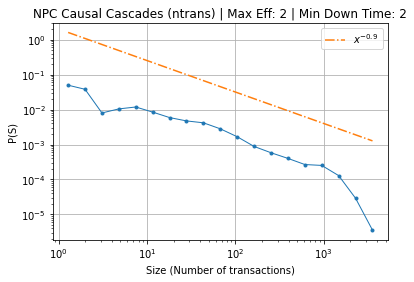

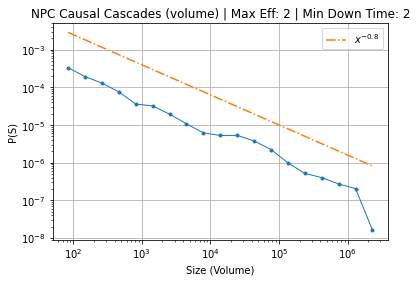

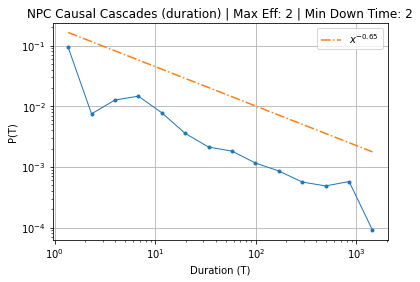

In [10]:
#npcsizes22, npcnrows22, npcduration22
hist, bins = np.histogram(npcnrows22, bins=np.logspace(np.log10(min(npcnrows22)),np.log10(max(npcnrows22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.9)*2, '-.', label= "$x^{-0.9}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_200_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes22, bins=np.logspace(np.log10(min(npcsizes22)),np.log10(max(npcsizes22)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8)/10, '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_200_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration22, bins=np.logspace(np.log10(min(npcduration22)),np.log10(max(npcduration22)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration22),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.65)/5, '-.', label= "$x^{-0.65}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_200_7200_100_5_10_maxeff2_maxsep2.png", dpi=250)
plt.show()
plt.close()

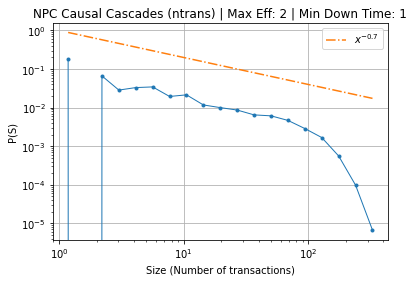

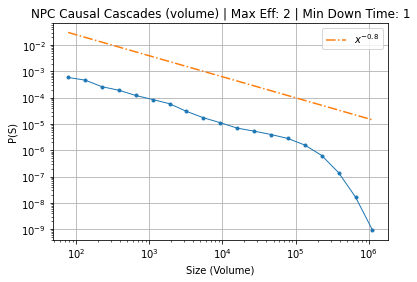

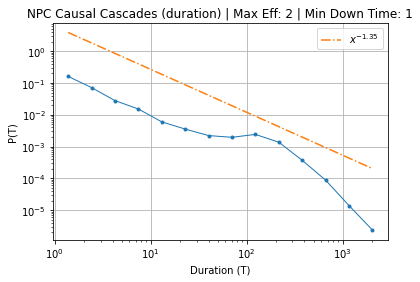

In [21]:
#npcsizes21, npcnrows21, npcduration21
hist, bins = np.histogram(npcnrows21, bins=np.logspace(np.log10(min(npcnrows21)),np.log10(max(npcnrows21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.7), '-.', label= "$x^{-0.7}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes21, bins=np.logspace(np.log10(min(npcsizes21)),np.log10(max(npcsizes21)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-0.8), '-.', label= "$x^{-0.8}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration21, bins=np.logspace(np.log10(min(npcduration21)),np.log10(max(npcduration21)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration21),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*6, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 2 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff2_maxsep1.png", dpi=250)
plt.show()
plt.close()

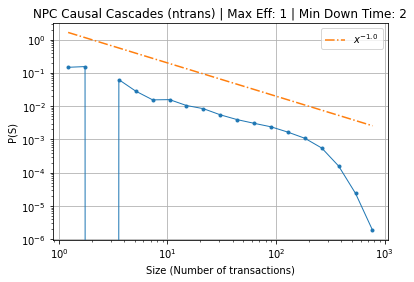

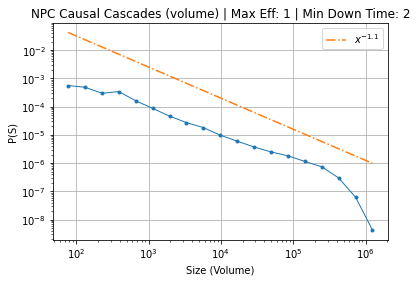

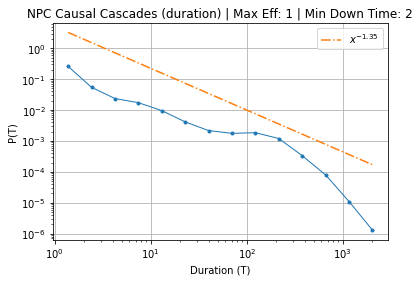

In [23]:
#npcsizes12, npcnrows12, npcduration12
hist, bins = np.histogram(npcnrows12, bins=np.logspace(np.log10(min(npcnrows12)),np.log10(max(npcnrows12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.0)*2, '-.', label= "$x^{-1.0}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes12, bins=np.logspace(np.log10(min(npcsizes12)),np.log10(max(npcsizes12)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration12, bins=np.logspace(np.log10(min(npcduration12)),np.log10(max(npcduration12)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration12),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*5, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 2")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep2.png", dpi=250)
plt.show()
plt.close()

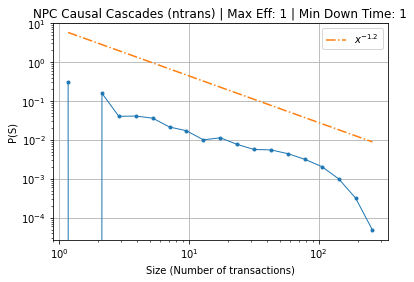

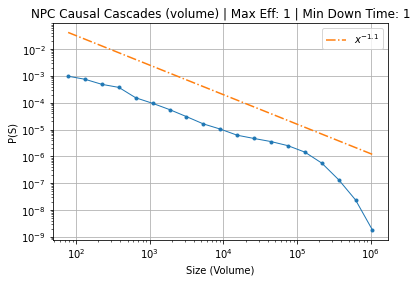

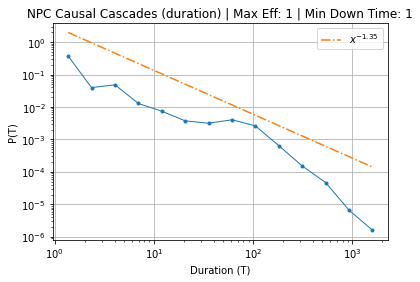

In [24]:
#npcsizes11, npcnrows11, npcduration11
hist, bins = np.histogram(npcnrows11, bins=np.logspace(np.log10(min(npcnrows11)),np.log10(max(npcnrows11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
#     print(np.array([((bins[i]+bins[i+1])/2)]))
#     avg = np.array([(bins[i]+bins[i+1])/2])
    avg = (bins[i]+bins[i+1])/2
#     print((avg.shape))
#     print((mid.shape))
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcnrows11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.2)*7, '-.', label= "$x^{-1.2}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (ntrans) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Number of transactions)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_ntrans_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcsizes11, bins=np.logspace(np.log10(min(npcsizes11)),np.log10(max(npcsizes11)),20))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)

plt.plot(mid,numpy.divide(hist,binsize)/len(npcsizes11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.1)*5, '-.', label= "$x^{-1.1}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (volume) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(S)')
plt.xlabel('Size (Volume)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_volume_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

hist, bins = np.histogram(npcduration11, bins=np.logspace(np.log10(min(npcduration11)),np.log10(max(npcduration11)),15))
binsize = np.diff(bins)

hist = np.asnumpy(hist)
bins = np.asnumpy(bins)
binsize = np.asnumpy(binsize)

mid = numpy.array([])
for i in range(len(binsize)):
    avg = (bins[i]+bins[i+1])/2
    mid = numpy.append(mid,avg)
    
plt.plot(mid,numpy.divide(hist,binsize)/len(npcduration11),'o-', linewidth = 1, markersize = 3)
plt.plot(mid,numpy.power(mid,-1.35)*3, '-.', label= "$x^{-1.35}$")
plt.loglog()
plt.legend()
plt.title("NPC Causal Cascades (duration) | Max Eff: 1 | Min Down Time: 1")
plt.ylabel('P(T)')
plt.xlabel('Duration (T)')
plt.grid(True)
plt.savefig("./results/nopricechange/7-9/npcplots/causalcascade_duration_npc_100_7200_100_new2threshold_fixedhurst_maxeff1_maxsep1.png", dpi=250)
plt.show()
plt.close()

In [12]:
import numpy 

# Troubleshooting

In [112]:
maxSep , maxtimeeff = 2,2
TtotalOrders = TtotalOrdersNPC
cascades = {}
numCascade = 0
# while len(TtotalOrders) > 0:
#     totalTimeOrders = TtotalOrders[TtotalOrders['time']==t]
    # seed with first portfolio
print("OG Orders left: ", len(TtotalOrders))
seed = TtotalOrders['portfolio'].loc[0]
t0 = TtotalOrders['time'].loc[0]

seedCascade = findPortfOrderCascadeGPU(TtotalOrders, seed, t0, maxSep = maxSep)
cascades[numCascade] = seedCascade

# Dictionary keeping track of how long a stock is still "affected" from previous trade
stockTimes = {}

for row in np.asarray(seedCascade.index):
    row = row.item()
    stock = seedCascade['stock'].loc[row]
    time = seedCascade['time'].loc[row]
    order = seedCascade['order'].loc[row]
    if stock in stockTimes:
        stockTimes[stock] += abs(order)*maxtimeeff
    else:
        stockTimes[stock] = time + abs(order)*maxtimeeff

# check first cascade is greater than 0
assert len(seedCascade) > 0

# remove rows included in first cascade from the order list
TtotalOrders=TtotalOrders.drop(labels = seedCascade.index, axis=0)
# print(TtotalOrders)
print(seedCascade)
#PT2
#     # NEW VERSION (PORTFOLIO PERSPECTIVE)
for childPortf in (TtotalOrders['portfolio'].unique()).values_host:
    match = False

#     # see if the current portfolio has overlapping stocks with the ongoing cascade 
    if any(np.isin(cascades[numCascade]['stock'].values,np.asarray(traderIDsNPC[childPortf].stocks))):
#         # check if overlapping portfolio is already included in the ongoing cascade
        if childPortf not in cascades[numCascade]['portfolio']:
#             # include new portfolio into the cascade along with all of its cascading trading activity
            childPortfCascade = findPortfOrderCascadeGPU(TtotalOrders,childPortf,t0, maxSep = maxSep)
#             # check if trading activity falls into the time affect window of ongoing cascade
            print(childPortfCascade)
            for row in np.asarray(childPortfCascade.index):
                row = row.item()
                stock = childPortfCascade['stock'].loc[row]
                time = childPortfCascade['time'].loc[row]
                order = childPortfCascade['order'].loc[row]
                if stock in stockTimes:
                    if time <= stockTimes[stock]:
                        match = True
                        print(stock)
                        break 
            if match == True:        
#                 # add new cascade to the ongoing cascade and remove rows from the orderList
                cascades[numCascade] = pd.concat([cascades[numCascade],childPortfCascade])
#                 TtotalOrders = TtotalOrders[~TtotalOrders.isin(childPortfCascade)].dropna()
                TtotalOrders=TtotalOrders.drop(labels = childPortfCascade.index, axis=0)
#                 # add new stocks and their time affects, or extend time affects of previous stocks
                for row in np.asarray(childPortfCascade.index):
                    row = row.item()
                    stock = childPortfCascade['stock'].loc[row]
                    time = childPortfCascade['time'].loc[row]
                    order = childPortfCascade['order'].loc[row]
                    if stock in stockTimes:
                        stockTimes[stock] += abs(order)*maxtimeeff
                    else:
                        stockTimes[stock] = time + abs(order)*maxtimeeff

print("Cascade length: ",len(cascades[numCascade]))
print("New Orders left: ", len(TtotalOrders))
print("making new cascade")
print("\n")
numCascade += 1

# print(cascadeStocks)
# print(cascadePortfs)
# print(cascadeTime)
# print(cascades)

OG Orders left:  7088505
      Unnamed: 0  time portfolio  stock  order
0              2   993     cwodj      2   -1.0
1              6   993     cwodj      6    1.0
2113           1   995     cwodj      1   -1.0
2114           2   995     cwodj      2   -1.0
2115           3   995     cwodj      3    4.0
2116           4   995     cwodj      4   -1.0
3146           1   996     cwodj      1   -1.0
      Unnamed: 0  time portfolio  stock  order
1499           3   994     agibt      3    1.0
1500           4   994     agibt     83   -1.0
1501           6   994     agibt     31    1.0
2529           3   995     agibt      3    3.0
2530           6   995     agibt     31   -2.0
4522           3   997     agibt      3    2.0
6536           3   999     agibt      3   -4.0
6537           6   999     agibt     31    1.0
7576           3  1000     agibt      3   -1.0
7577           4  1000     agibt     83    1.0
3
       Unnamed: 0  time portfolio  stock  order
478             2   993     ahik

       Unnamed: 0  time portfolio  stock  order
330             0   993     ajpet     51  -10.0
331             3   993     ajpet     24   10.0
332             4   993     ajpet     18    8.0
333             6   993     ajpet     54   -1.0
334             7   993     ajpet     91   -1.0
335             8   993     ajpet     43    1.0
1446            0   994     ajpet     51    2.0
1447            2   994     ajpet     88    5.0
1448            3   994     ajpet     24    7.0
1449            6   994     ajpet     54   -9.0
1450            7   994     ajpet     91   -4.0
1451            8   994     ajpet     43    3.0
3422            0   996     ajpet     51   -6.0
3423            2   996     ajpet     88    7.0
3424            3   996     ajpet     24   10.0
3425            4   996     ajpet     18   -6.0
3426            6   996     ajpet     54   -7.0
3427            7   996     ajpet     91    1.0
3428            8   996     ajpet     43    5.0
5491            0   998     ajpet     51

      Unnamed: 0  time portfolio  stock  order
716            2   993     aovfh     15    1.0
717            6   993     aovfh     20    1.0
718            7   993     aovfh     66   -2.0
1767           2   994     aovfh     15    1.0
1768           7   994     aovfh     66   -2.0
2771           2   995     aovfh     15   -1.0
2772           3   995     aovfh     35    2.0
3774           2   996     aovfh     15   -1.0
3775           6   996     aovfh     20   -1.0
3776           7   996     aovfh     66    2.0
4775           6   997     aovfh     20    1.0
15
       Unnamed: 0  time portfolio  stock  order
76              0   993     apxte     15    1.0
77              1   993     apxte     30    1.0
78              3   993     apxte     43    1.0
79              7   993     apxte     32   -3.0
80              8   993     apxte     56   -1.0
...           ...   ...       ...    ...    ...
86483           0  1075     apxte     15   -1.0
86484           1  1075     apxte     30   -1.0
8

KeyboardInterrupt: 

In [106]:
seed = TtotalOrders['portfolio'].iloc[0]
t0 = TtotalOrders['time'].iloc[0]

In [108]:
TtotalOrders

Unnamed: 0  time portfolio  stock  order
41                9   993     zjwdk     51   -2.0
69                2   993     ztnkc     15    1.0
70                4   993     ztnkc     60   -1.0
71                7   993     ztnkc     95   -1.0
262               3   993     zdmkf     98    9.0
...             ...   ...       ...    ...    ...
7088500           2  8192     gnqpm     56  -25.0
7088501           3  8192     gnqpm     55   10.0
7088502           5  8192     gnqpm     79    2.0
7088503           6  8192     gnqpm     85   19.0
7088504           7  8192     gnqpm     76   21.0

[7056036 rows x 5 columns]

In [22]:
portfOrders = TtotalOrdersNPC[TtotalOrdersNPC['portfolio']=='cwodj']
portfOrders = portfOrders[portfOrders['time']>=993]
if len(portfOrders)>0:
    ToS = portfOrders['time'].unique()
#     print(ToS)
    sep = np.diff(ToS)
#     print(sep[:13])
#     print(max(sep))
    keySep = np.where(sep>2)[0]
#     print(keySep[:10])
    if len(keySep)>0:
        endtime = int(ToS.take(int(keySep[0]))) #end of this cascade
#         print(endtime)
#         print(ToS)
    else:
        endtime = int(ToS.take(-1))
    
    print("\n ENDTIME: ",(endtime))
    print(type(ToS))
    print(endtime, type(endtime))
#     print(type((endtime[int(keySep[0])])))
portfCascade = portfOrders.loc[portfOrders['time']<=(endtime)]



 ENDTIME:  996
<class 'cudf.core.series.Series'>
996 <class 'int'>


In [65]:
portfs = (TtotalOrders['portfolio'].unique()).values_host
# portfs.values_host

In [48]:
(seedCascade['stock'].loc[0]).item()

2

In [78]:
if childPortf in cascades[numCascade]['portfolio']

False

In [73]:
traderIDsNPC['gnqpm'].stocks

array([43, 26, 56, 55,  0, 79, 85, 76, 74])

In [43]:
type(np.asarray(seedCascade.index))

cupy.core.core.ndarray

In [79]:
a = pd.concat([seedCascade, seedCascade])


In [113]:
TtotalOrders.loc[TtotalOrders['time']<=993]

Unnamed: 0  time portfolio  stock  order
2              2   993     gozxi      6   -1.0
3              6   993     gozxi     10    2.0
4              7   993     gozxi     11    1.0
5              9   993     gozxi     13   -1.0
6             10   993     gozxi     14   -2.0
...          ...   ...       ...    ...    ...
1081           7   993     zwjtq     55   -2.0
1082           0   993     myduz     56   14.0
1083           1   993     myduz     55  -18.0
1084           4   993     myduz     85   38.0
1085           6   993     myduz     74  -14.0

[1040 rows x 5 columns]